In [3]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

In [4]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz")
df, csvs["opto"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz using pyarrow


(         obj_id    frame     timestamp  ...       P33       P44       P55
 0             0   186251  1.727267e+09  ...  0.001374  0.001349  0.003527
 1             0   186252  1.727267e+09  ...  0.001151  0.001062  0.001801
 2             0   186253  1.727267e+09  ...  0.001149  0.001082  0.001654
 3             0   186254  1.727267e+09  ...  0.001144  0.001072  0.001665
 4             0   186255  1.727267e+09  ...  0.001141  0.001063  0.001672
 ...         ...      ...           ...  ...       ...       ...       ...
 9527032   57000  8266826  1.727348e+09  ...  0.002831  0.004652  0.009208
 9527033   57000  8266827  1.727348e+09  ...  0.002935  0.005013  0.009732
 9527034   57000  8266828  1.727348e+09  ...  0.003049  0.005386  0.010232
 9527035   57000  8266829  1.727348e+09  ...  0.003170  0.005767  0.010717
 9527036   57000  8266830  1.727348e+09  ...  0.003259  0.006171  0.011206
 
 [9527037 rows x 18 columns],
     obj_id    frame         x  ...     timestamp   sham   heading
 

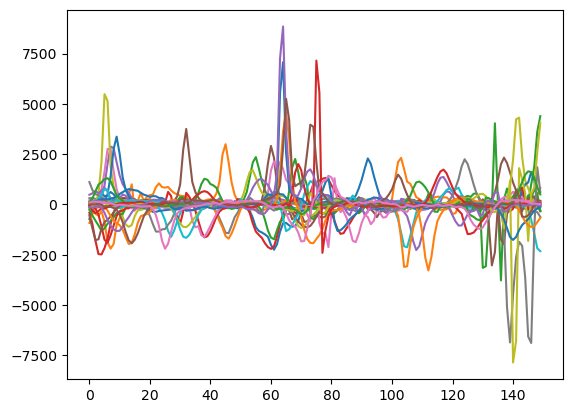

In [5]:
data = extract_stimulus_centered_data(df, csvs["opto"])
list(data)
AngV = data['angular_velocity']
fig = plt.figure()
for d in AngV:
    plt.plot(d)

plt.show()

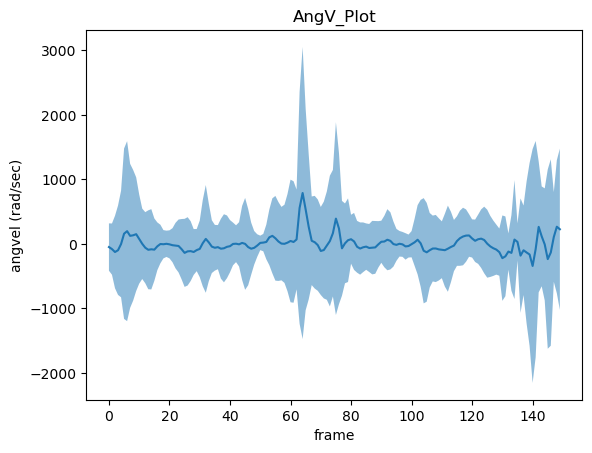

In [7]:
fig_combined, ax_combined = plt.subplots()
plot_mean_and_std(AngV, ax=ax_combined)
ax_combined.set_xlabel("frame")
ax_combined.set_ylabel("angvel (rad/sec)")
ax_combined.set_title("AngV_Plot")
plt.show()

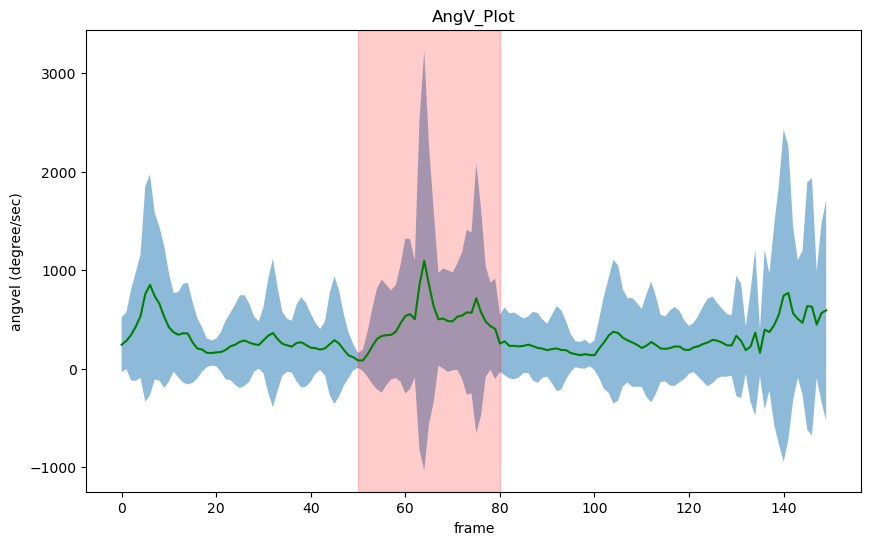

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV), ax=ax, label='Ang_Vel Plot of J72', color='green')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("AngV_Plot")
ax.axvspan(50, 80, color='red', alpha=0.2)

plt.show()